<h2>Dataset Link</h2>

https://www.kaggle.com/datasets/atharvasoundankar/ai-developer-productivity-dataset/data

<h2>Data Preprocessing</h2>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tensorflow as tf
from keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Dataset/ai_dev_productivity.csv')
df.head()

,hours_coding,coffee_intake_mg,distractions,sleep_hours,commits,bugs_reported,ai_usage_hours,cognitive_load,task_success
0,5.99,600,1,5.8,2,1,0.71,5.4,1
1,4.72,568,2,6.9,5,3,1.75,4.7,1
2,6.30,560,1,8.9,2,0,2.27,2.2,1
3,8.05,600,7,6.3,9,5,1.40,5.9,0
4,4.53,421,6,6.9,4,0,1.26,6.3,1


In [3]:
df.shape

(500, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   hours_coding      500 non-null    float64
 1   coffee_intake_mg  500 non-null    int64  
 2   distractions      500 non-null    int64  
 3   sleep_hours       500 non-null    float64
 4   commits           500 non-null    int64  
 5   bugs_reported     500 non-null    int64  
 6   ai_usage_hours    500 non-null    float64
 7   cognitive_load    500 non-null    float64
 8   task_success      500 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [5]:
df.describe()

,hours_coding,coffee_intake_mg,distractions,sleep_hours,commits,bugs_reported,ai_usage_hours,cognitive_load,task_success
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000
mean,5.015600,463.192000,2.976000,6.975800,4.60800,0.858000,1.510920,4.498200,0.606000
std,1.947253,142.334991,1.678409,1.455965,2.70499,1.102846,1.085557,1.868861,0.489124
min,0.000000,6.000000,0.000000,3.000000,0.00000,0.000000,0.000000,1.000000,0.000000
25%,3.600000,369.500000,2.000000,6.100000,3.00000,0.000000,0.697500,3.175000,0.000000
50%,5.030000,500.500000,3.000000,6.950000,5.00000,0.000000,1.260000,4.400000,1.000000
75%,6.275000,600.000000,4.000000,7.900000,6.00000,2.000000,2.070000,5.800000,1.000000
max,12.000000,600.000000,8.000000,10.000000,13.00000,5.000000,6.360000,10.000000,1.000000


In [6]:
df.duplicated().sum()

0

In [7]:
df['task_success'].value_counts()

task_success
1    303
0    197
Name: count, dtype: int64

<h2>EDA</h2>

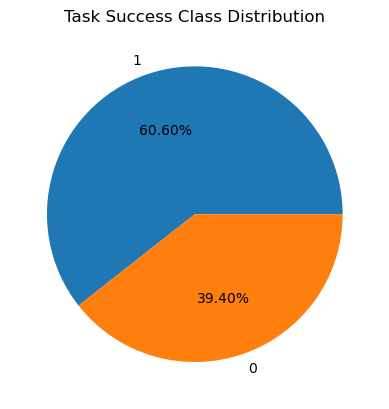

In [8]:
plt.pie(df['task_success'].value_counts(), labels=df['task_success'].value_counts().index, autopct='%1.2f%%')
plt.title('Task Success Class Distribution')
plt.show();

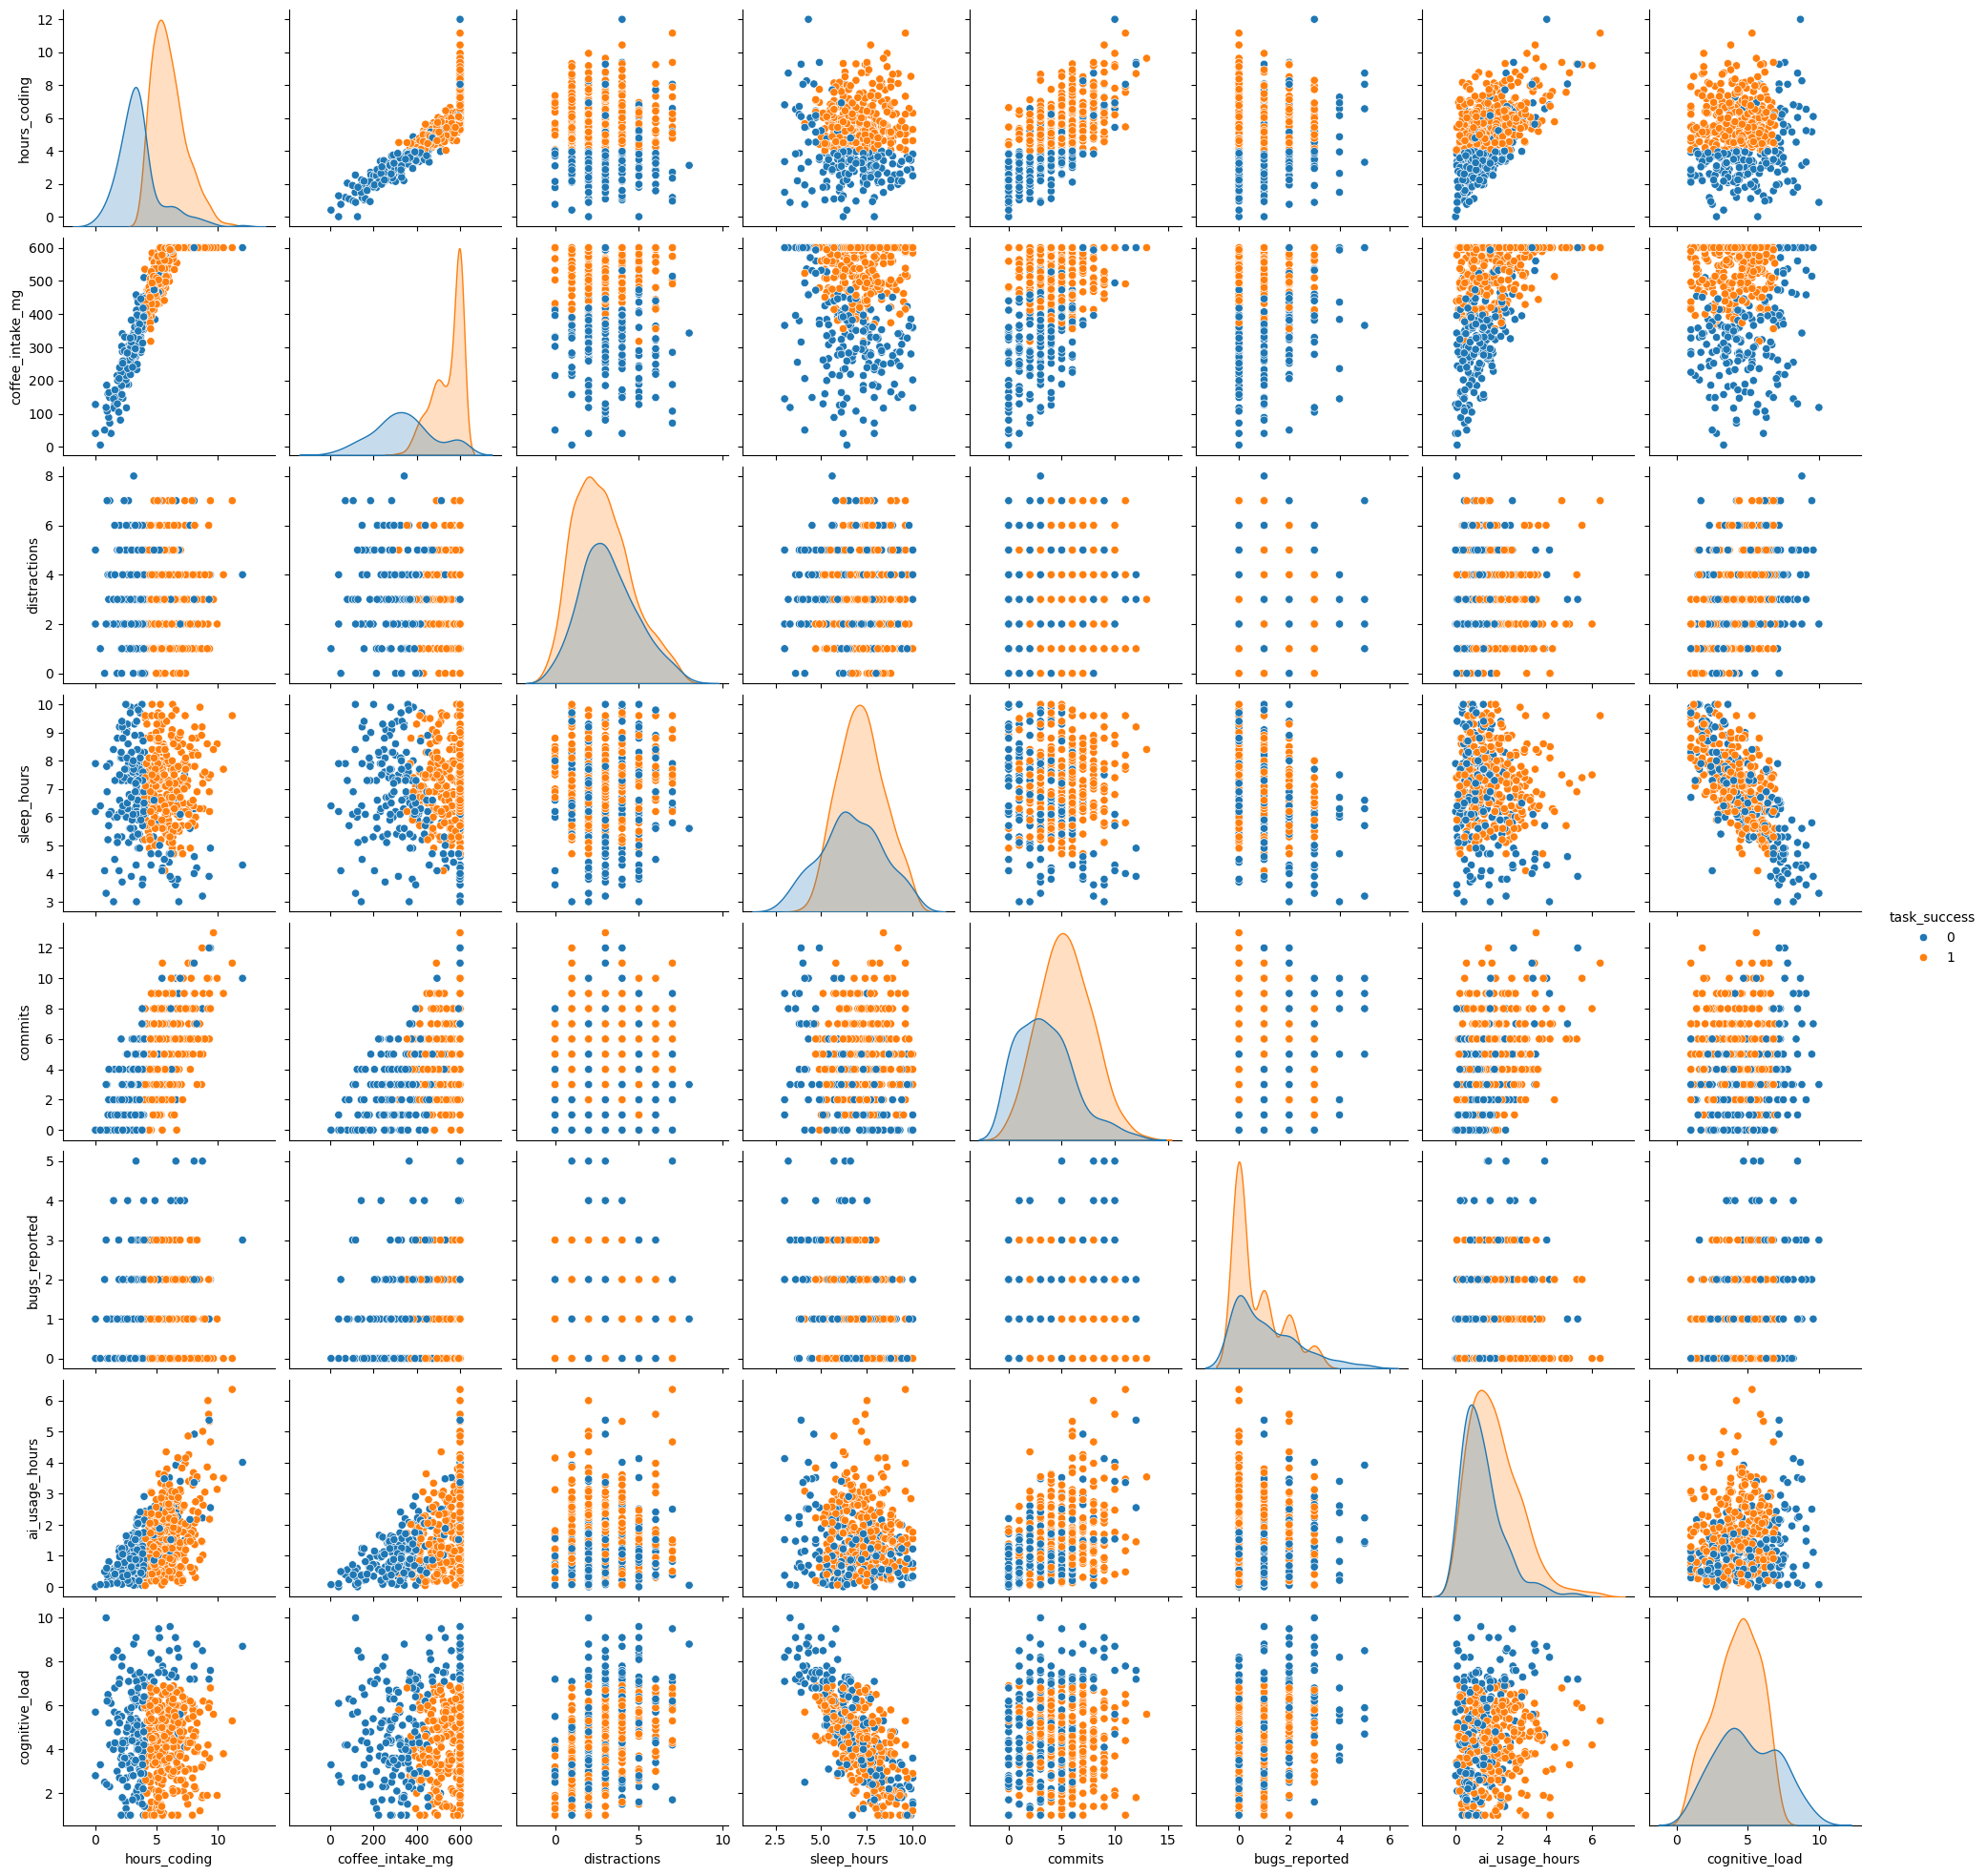

In [9]:
sns.pairplot(df, hue='task_success')

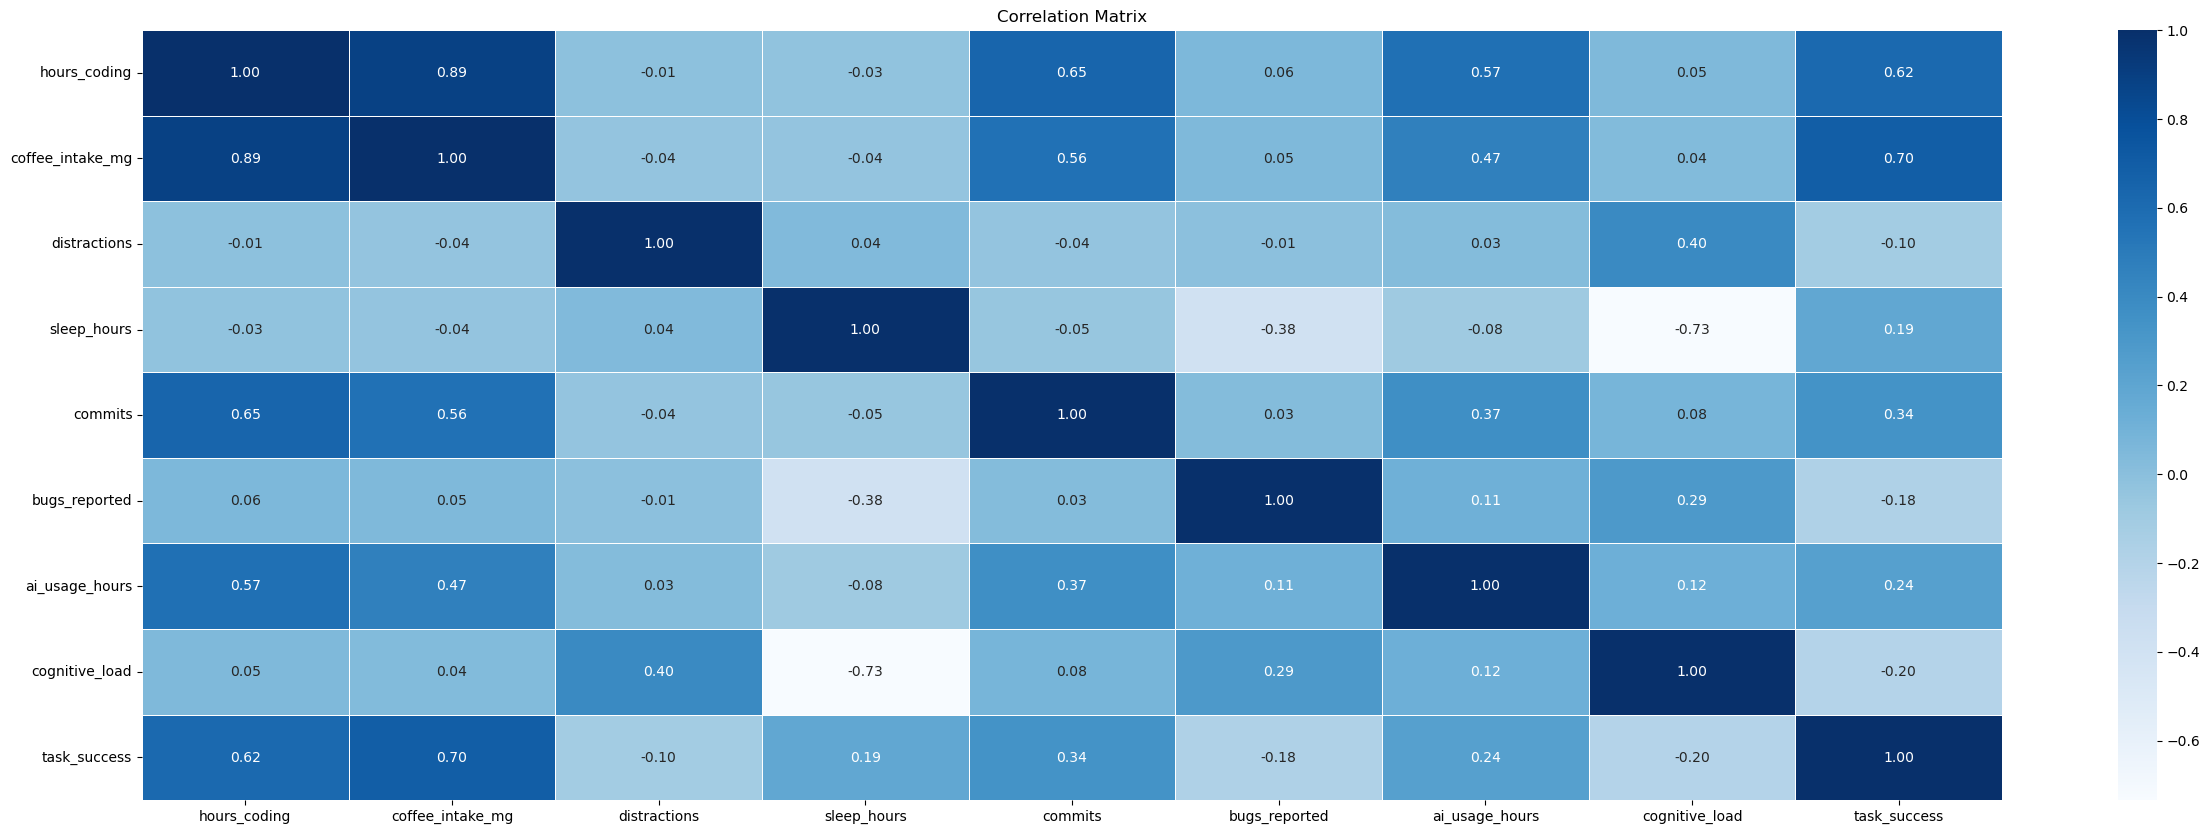

In [10]:
plt.figure(figsize=(30,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="Blues", fmt='.2f', linewidth=0.5)
plt.title('Correlation Matrix')
plt.show();

In [11]:
x = df.drop(['coffee_intake_mg', 'task_success'], axis=1)
y = df['task_success']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [12]:
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)
rf.score(x_train, y_train)

1.0

In [13]:
y_pred = rf.predict(x_test)
print('Accruacy test:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accruacy test: 0.99
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        34
           1       1.00      0.98      0.99        66

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100

[[34  0]
 [ 1 65]]


In [14]:
lr = LogisticRegression(random_state=42)
lr.fit(x_train, y_train)
lr.score(x_train, y_train)

0.87

In [15]:
y_pred = lr.predict(x_test)
print('Accruacy test:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accruacy test: 0.86
              precision    recall  f1-score   support

           0       0.76      0.85      0.81        34
           1       0.92      0.86      0.89        66

    accuracy                           0.86       100
   macro avg       0.84      0.86      0.85       100
weighted avg       0.87      0.86      0.86       100

[[29  5]
 [ 9 57]]


<h2>Deep Learning</h2>

In [16]:
nn = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = nn.fit(x_train, y_train, epochs=50, batch_size=10, validation_data = (x_test, y_test), callbacks=[EarlyStopping(patience=5)])

Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5828 - loss: 0.6604 - val_accuracy: 0.7900 - val_loss: 0.5260
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8386 - loss: 0.4526 - val_accuracy: 0.8100 - val_loss: 0.4628
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8435 - loss: 0.3808 - val_accuracy: 0.8300 - val_loss: 0.4033
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8443 - loss: 0.3341 - val_accuracy: 0.8800 - val_loss: 0.3454
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8778 - loss: 0.2541 - val_accuracy: 0.8600 - val_loss: 0.3199
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9091 - loss: 0.2087 - val_accuracy: 0.8700 - val_loss: 0.2822
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9238 - loss: 0.1919 - val_accuracy: 0.8700 - val_loss: 0.2513
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9512 - loss: 0.1718 - val_accuracy: 0.9000 - val_loss:

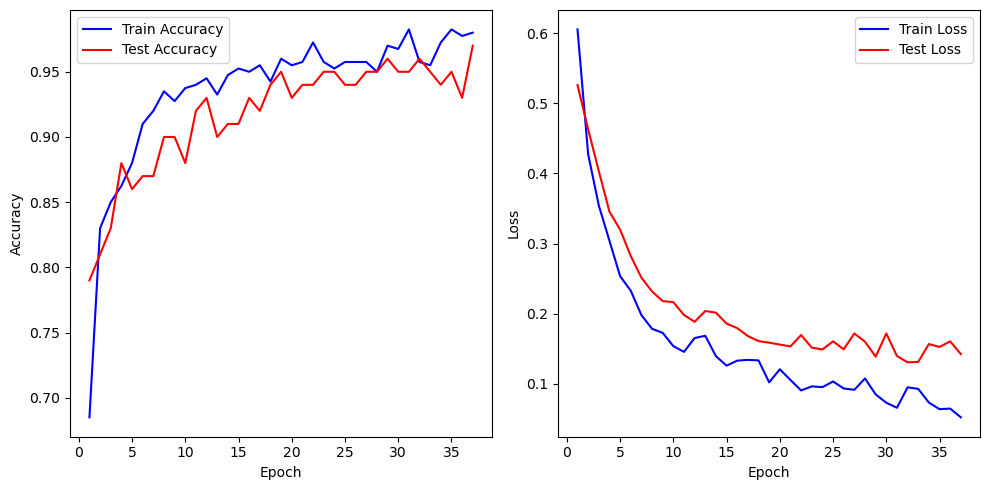

In [17]:
# learning curve
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
# creating subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].plot(epochs, acc, 'b', label='Train Accuracy')
axes[0].plot(epochs, val_acc, 'r', label='Test Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

axes[1].plot(epochs, loss, 'b', label='Train Loss')
axes[1].plot(epochs, val_loss, 'r', label='Test Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
# adusting layout for better spacing
plt.tight_layout()
# display the figure
plt.show();

In [18]:
pred = nn.predict(x_test)
y_pred = (pred>0.5).astype(int)

print("Test Accuracy:", accuracy_score(y_test, y_pred))    
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Test Accuracy: 0.97
              precision    recall  f1-score   support

           0       0.94      0.97      0.96        34
           1       0.98      0.97      0.98        66

    accuracy                           0.97       100
   macro avg       0.96      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100

[[33  1]
 [ 2 64]]


<h2>Machine Learning vs Deep Learning</h2>

In [19]:
new_df = [[5,2,7,3,1,1,4]]
scaled_df = sc.transform(new_df)

RF_pred = rf.predict(scaled_df)
LR_pred = lr.predict(scaled_df)

DL_prediction = nn.predict(scaled_df)
DL_prediction = (DL_prediction >= 0.5).astype(int)

print("RF Prediction:", RF_pred)
print("LR Prediction:", LR_pred)
print("DL Prediction:", DL_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
RF Prediction: [1]
LR Prediction: [1]
DL Prediction: [[1]]
